In [75]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [76]:
df = pd.read_csv('dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,...,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 78
0,0,0,0,0,2.798293,0.769563,-0.528015,1.951881,-0.431077,-0.641827,...,0,0,0,1,0,0,2.753333,599.0,612.000000,13.000000
1,1,1,1,1,0.055436,-0.361432,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.600000,530.0,613.000000,83.000000
2,2,2,2,2,0.782458,0.017999,-0.528015,0.600491,-0.431077,-0.641827,...,0,0,0,1,0,0,3.500000,595.0,610.000000,15.000000
3,3,4,4,4,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.520000,520.0,612.000000,92.000000
4,4,5,5,5,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.660000,590.0,612.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,214,214,214,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,5.433333,570.0,605.000000,35.000000
213,213,215,215,215,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,5.433333,562.0,605.000000,43.000000
214,214,216,216,216,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,5.433333,549.0,589.666667,40.666667
215,215,217,217,217,-0.423738,-0.631411,-0.201566,-0.304661,-0.085945,-0.600008,...,0,0,0,0,0,0,2.000000,523.0,597.000000,74.000000


In [77]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium palmitate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [60]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:34<00:00, 18.94s/it]

0.33404040404040397 1 10 4


### 2D. Decision Tree 

In [62]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:17<00:00,  6.83s/it]

0.33232323232323224 20 16 28


### 3D. Random Forest

In [63]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [17:08<00:00, 34.27s/it]

0.38906493506493495 16 3 11


### 4D. K Neighbors

In [64]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  2.02it/s]

0.44207070707070706 2 2


### Saving Decision Tree model

In [66]:
DT_regr = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
DT_regr.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))
joblib.dump(ET_regr_d, "./model_SO_diameter_DecisionTree.joblib")

['./model_SO_diameter_DecisionTree.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [27]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:38<00:00, 19.09s/it]

11.464646460606067 1 19 10


### 2E. Decision Trees

In [28]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:48<00:00,  5.81s/it]

11.7979797926407 12 16 66


### 3E. Random Forest

In [29]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [16:31<00:00, 33.03s/it]

15.066370349380778 14 14 9


### 4E. K Neighbors

In [30]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:18<00:00,  2.07it/s]

15.676767672727278 1 4


### Saving Extra Trees model

In [55]:
ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=19,     
                            random_state=10).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [14:53<00:00, 30.82s/it]

21.772727272727273 2 25 11


### 2A. Decision Trees


In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:22<00:00,  6.99s/it]

20.595959593939398 20 20 12


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [6]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [18:57<00:00, 37.92s/it]

23.743265995033656 19 12 11


### 4E. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  1.98it/s]

25.05050505151515 1 1


### Saving model

In [56]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12)
DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

joblib.dump(DT_regr_a, "./model_SO_abs_DecisionTree.joblib")

['./model_SO_abs_DecisionTree.joblib']

## Analyzing

In [83]:
## Diameter

DT_regr = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
DT_regr.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, DT_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, DT_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=19,     
                            random_state=10).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = DT_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
A_r_2 = r2_score(Y_test_a, DT_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, DT_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.722382               0.332323               0.29973                   0.547476
Absorption  0.715759              20.596               1033.21                     32.1436
Emission    0.838137              11.4646               405.795                    20.1443


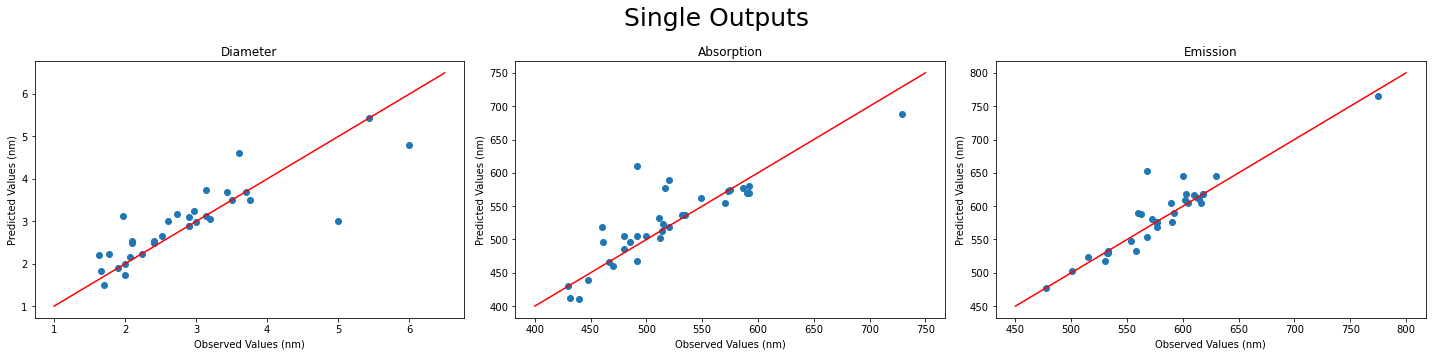

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, DT_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, DT_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [94]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = DT_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance


[('temp_c', 0.2197705845090209),
 ('time_min', 0.14861232814590902),
 ('x7_None', 0.09849710216892996),
 ('amine_amount_mmol', 0.0858852953673919),
 ('total_volume_ml', 0.07233345402138885),
 ('TOP_amount_mmol', 0.07109420883009378),
 ('x1_phosphine gas', 0.05891206796682794),
 ('x7_zinc iodide', 0.03746051309755293),
 ('x8_water', 0.034318177872038086),
 ('acid_amount_mmol', 0.02603300508947207),
 ('p_amount_mmol', 0.02098466258492522),
 ('x7_zinc chloride', 0.020344198969800435),
 ('x5_None', 0.015394351654261793),
 ('other_amount_mmol', 0.013926791047683594),
 ('x7_zinc bromide', 0.013366648584885725),
 ('x4_lauric acid', 0.012647803374373634),
 ('x0_indium chloride', 0.011207738505694315),
 ('x4_stearic acid', 0.00846879917214322),
 ('in_amount_mmol', 0.008174599777625944),
 ('x3_trioctylphosphine', 0.007182732083198252),
 ('x0_indium iodide', 0.0044419972903610395),
 ('sol_amount_ml', 0.0041175291495416004),
 ('zinc_amount_mmol', 0.001882284230793519),
 ('x1_sodium phosphide', 0.0

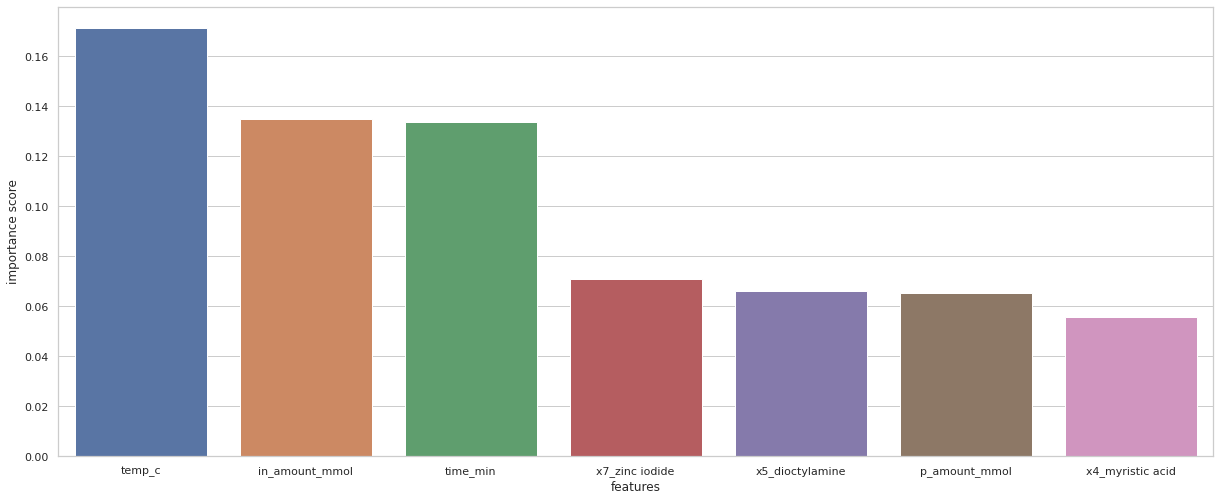

In [95]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [96]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x7_None', 0.14971628146089888),
 ('x0_indium oxalate', 0.11635116977876782),
 ('time_min', 0.10622227690585892),
 ('temp_c', 0.10591548312275978),
 ('x7_zinc iodide', 0.08309065786184468),
 ('x0_indium chloride', 0.07286107842374984),
 ('total_volume_ml', 0.037688035517084724),
 ('x1_phosphine gas', 0.03762058546484096),
 ('x7_zinc oleate', 0.03567404522182629),
 ('other_amount_mmol', 0.03563128809048837),
 ('in_amount_mmol', 0.029260170543899518),
 ('x7_zinc bromide', 0.025157258792322324),
 ('x3_None', 0.02480400023861778),
 ('x4_None', 0.02208329873378935),
 ('x5_dioctylamine', 0.016932496785663276),
 ('acid_amount_mmol', 0.01690420028341343),
 ('x1_white phosphorus', 0.014194439316321302),
 ('x0_indium bromide', 0.011765868416090246),
 ('p_amount_mmol', 0.009317873357110006),
 ('TOP_amount_mmol', 0.007694884946928168),
 ('x4_lauric acid', 0.005549274401949622),
 ('x8_None', 0.005126392434083934),
 ('sol_amount_ml', 0.004495168820410586),
 ('x2_octadecene', 0.0040412340577390665)

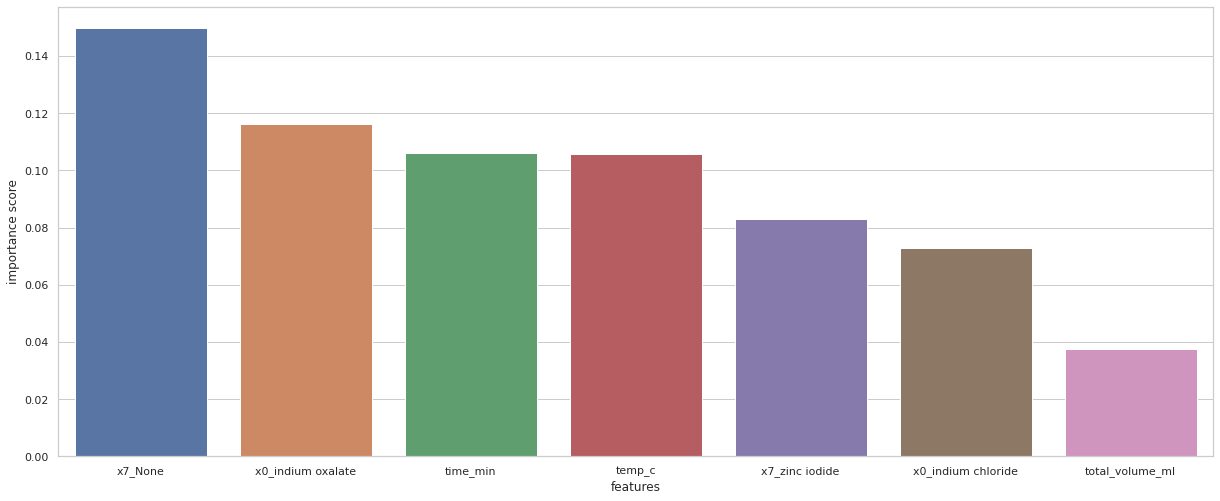

In [97]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [98]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = DT_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance

[('temp_c', 0.2197705845090209),
 ('time_min', 0.14861232814590902),
 ('x7_None', 0.09849710216892996),
 ('amine_amount_mmol', 0.0858852953673919),
 ('total_volume_ml', 0.07233345402138885),
 ('TOP_amount_mmol', 0.07109420883009378),
 ('x1_phosphine gas', 0.05891206796682794),
 ('x7_zinc iodide', 0.03746051309755293),
 ('x8_water', 0.034318177872038086),
 ('acid_amount_mmol', 0.02603300508947207),
 ('p_amount_mmol', 0.02098466258492522),
 ('x7_zinc chloride', 0.020344198969800435),
 ('x5_None', 0.015394351654261793),
 ('other_amount_mmol', 0.013926791047683594),
 ('x7_zinc bromide', 0.013366648584885725),
 ('x4_lauric acid', 0.012647803374373634),
 ('x0_indium chloride', 0.011207738505694315),
 ('x4_stearic acid', 0.00846879917214322),
 ('in_amount_mmol', 0.008174599777625944),
 ('x3_trioctylphosphine', 0.007182732083198252),
 ('x0_indium iodide', 0.0044419972903610395),
 ('sol_amount_ml', 0.0041175291495416004),
 ('zinc_amount_mmol', 0.001882284230793519),
 ('x1_sodium phosphide', 0.0

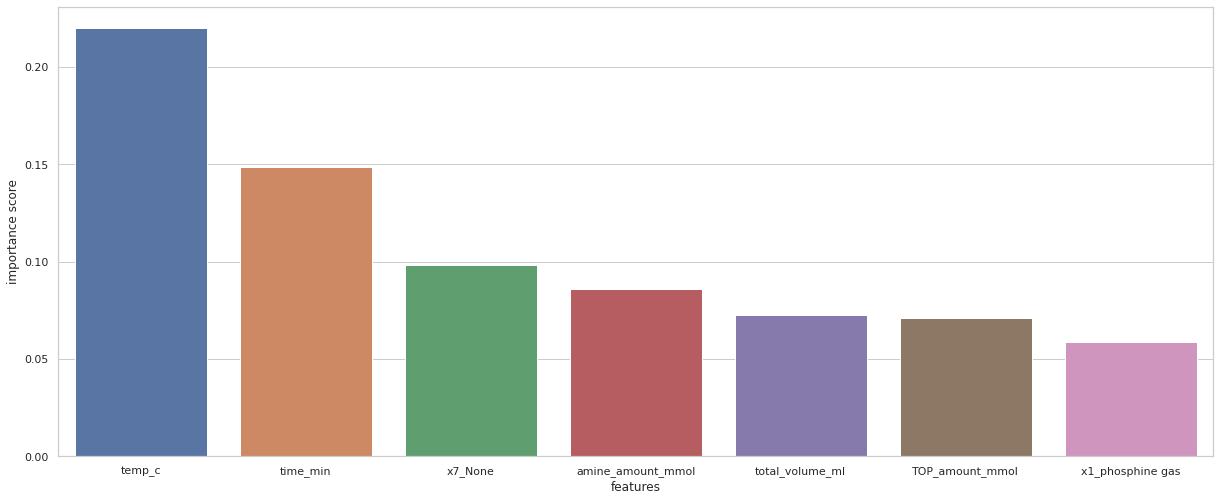

In [101]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])
import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

### Combine


In [113]:
sorted_e[0][1]

0.0005367478526171136

In [112]:
sorted_e[0][1] + sorted_a[0][1]

0.0024190320834106323

In [ ]:
for i in range(0,71):
    